In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import yaml
yml_path = "../../Da/config_moreobs_mean1.yml"
with open(yml_path, 'r') as stream:
    config = yaml.safe_load(stream)

xp_data = xr.open_mfdataset(config['save_path'] + config['job_name'] + '/xp*.nc')['xp']

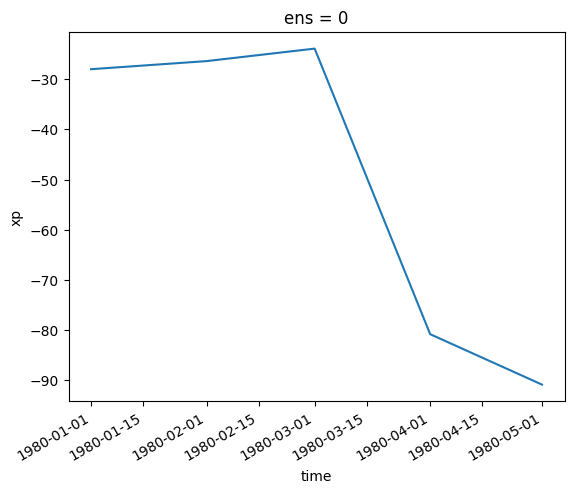

In [18]:
xp0 = xp_data.mean(axis=(2,3,4)).compute()
xp0[:5,0].plot()

In [11]:
data = xr.open_mfdataset("/glade/work/zilumeng/3D_trans/Da/Da_res/eminus4/xp_*.nc")
# data

# obs_loc =np.array([[269,0],[278,7],[123,-6]])
# data['xa'].mean(dim='ens')[0,2].plot()
# plt.scatter(obs_loc[:,0],obs_loc[:,1],marker='o',color='r')

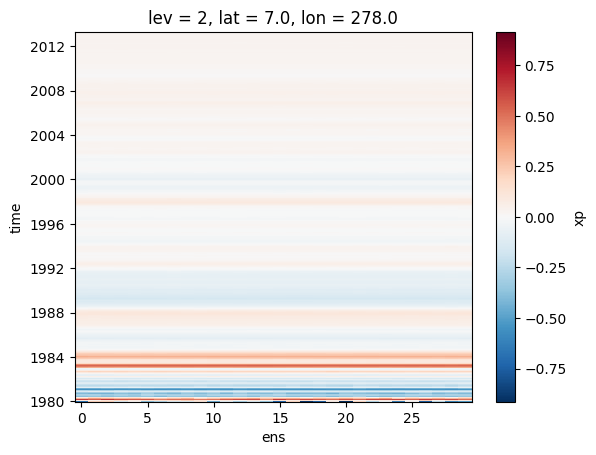

In [12]:
obs1 = data['xp'].loc[:,:,2,7.0,278].chunk({'time':-1})
obs1.plot()

In [9]:
obs1_var  = obs1.var(dim='ens').compute()

In [10]:
obs1_var

<xarray.DataArray 'xp' (time: 400)>
array([0.11244592, 0.0149378 , 0.00324394, 0.00193793, 0.00220442,
       0.00400509, 0.00645592, 0.00750448, 0.00752533, 0.00693162,
       0.00643064, 0.0054956 , 0.00361034, 0.00190044, 0.00099477,
       0.00077554, 0.00091048, 0.00133167, 0.00171984, 0.00189045,
       0.00193855, 0.00201576, 0.00212147, 0.00211758, 0.00204986,
       0.00189884, 0.00174407, 0.00158438, 0.00142899, 0.00133179,
       0.00134955, 0.00147753, 0.0016966 , 0.00195165, 0.00221733,
       0.00250258, 0.00275366, 0.00311189, 0.00338926, 0.0034535 ,
       0.00296319, 0.00224805, 0.00276092, 0.00381293, 0.005724  ,
       0.00715541, 0.00631982, 0.00411397, 0.00203322, 0.00083571,
       0.00082435, 0.00117316, 0.00156335, 0.00201826, 0.00209549,
       0.00172532, 0.00134739, 0.00098962, 0.00066295, 0.00041691,
       0.00035671, 0.00056707, 0.00104206, 0.00175421, 0.00223238,
       0.00254243, 0.00302201, 0.00353909, 0.00383049, 0.00386066,
       0.00377636, 0.00387424, 0.00399432, 0.00397822, 0.00383849,
       0.00369955, 0.0037523 , 0.00374787, 0.00371036, 0.0036507 ,
       0.0035894 , 0.00351947, 0.00345636, 0.00340352, 0.00327827,
       0.00304507, 0.00273562, 0.00245468, 0.00220963, 0.00200575,
       0.00185738, 0.00173343, 0.00161505, 0.00152003, 0.00143545,
       0.00134148, 0.00124409, 0.00116115, 0.00112441, 0.00114374,
...
       0.00053957, 0.0005162 , 0.00051317, 0.0005098 , 0.00051958,
       0.00052921, 0.00053221, 0.00053664, 0.00053814, 0.00053762,
       0.00053731, 0.0005426 , 0.00056241, 0.00059635, 0.00061978,
       0.00063171, 0.00064367, 0.00064508, 0.00064836, 0.00065936,
       0.00066057, 0.00064042, 0.00060145, 0.00056218, 0.00053504,
       0.00052004, 0.00051717, 0.00051906, 0.0005127 , 0.00049969,
       0.00048809, 0.00048232, 0.00048539, 0.00048679, 0.00048277,
       0.00046972, 0.00045476, 0.00044783, 0.00044271, 0.00043652,
       0.00042446, 0.00039944, 0.00037285, 0.00035631, 0.00034657,
       0.0003384 , 0.00033945, 0.0003568 , 0.0003889 , 0.0004267 ,
       0.00046401, 0.00049619, 0.00051201, 0.00051004, 0.00049669,
       0.00048188, 0.00046903, 0.000473  , 0.00049392, 0.00053184,
       0.00057891, 0.00062815, 0.00066736, 0.00070098, 0.00071981,
       0.00071501, 0.00069199, 0.00066908, 0.00065253, 0.00064649,
       0.0006421 , 0.00063378, 0.00059987, 0.00056292, 0.00054071,
       0.00052559, 0.00050074, 0.00046765, 0.00043536, 0.00041262,
       0.00039135, 0.00036222, 0.00034023, 0.00033423, 0.00034801,
       0.00036872, 0.0003853 , 0.00039735, 0.00039581, 0.00038394,
       0.00036685, 0.00034853, 0.00034461, 0.00035555, 0.00037513,
       0.00039619, 0.00040745, 0.00042096, 0.00042034, 0.00040543])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2013-04-01
    lev      int64 2
    lat      float64 7.0
    lon      float64 278.0

In [18]:
nino34 = data['xa'].loc[:,:,2,-5:5,190:240].mean(['lat','lon']).compute()

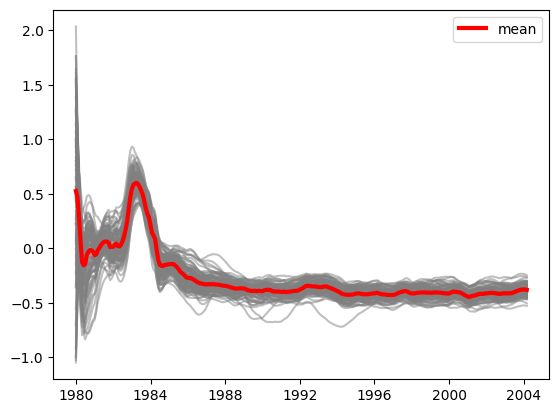

In [19]:
# nino34.plot()
tm = nino34.time
for ens_num in range(100):
    plt.plot(tm,nino34[:,ens_num],color='grey',alpha=0.5)
plt.plot(tm,nino34.mean(dim='ens'),color='red',linewidth=3,label='mean')
plt.legend()

In [20]:
data

<xarray.Dataset>
Dimensions:  (time: 291, ens: 100, lev: 9, lat: 51, lon: 120)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2004-03-01
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 92.0 94.0 96.0 98.0 100.0 ... 324.0 326.0 328.0 330.0
Data variables:
    xa       (time, ens, lev, lat, lon) float64 dask.array<chunksize=(1, 100, 9, 51, 120), meta=np.ndarray>
Attributes:
    config:   {'job_name': 'pointone', 'start_time': datetime.datetime(1980, ...

In [51]:
# xr.Dataset({'data':data})
data.to_netcdf('test.nc')

In [52]:
# xr.open_dataset('test.nc')

<xarray.Dataset>
Dimensions:  (time: 1, ens: 100, lev: 9, lat: 51, lon: 120)
Coordinates:
  * time     (time) datetime64[ns] 1980-10-01
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 92.0 94.0 96.0 98.0 100.0 ... 324.0 326.0 328.0 330.0
Data variables:
    xa       (time, ens, lev, lat, lon) float64 ...
Attributes:
    da:       1

In [30]:
import numpy as np

np.load("../Da_res/post_mean_try_lim_12/plot_data.npy",allow_pickle=True).item().keys()

dict_keys(['Correlation', 'Equator_Correlation', 'Xa_Nino34', 'real_Nino34'])